### Gathering Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import tweepy_credentials as creds
import json
import datetime as dt

%matplotlib inline

# set style
sns.set_style('darkgrid')

In [2]:
# create pandas DataFrame for the WeRateDogs Twitter archive
df_archive = pd.read_csv('data/twitter-archive-enhanced.csv')

# check
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
## download, save, and create pandas DataFrame for the tweet image predictions
# create response object using requests.get() method
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Check the status where 200 being the HTTP status code for the request has succeeded.
response

<Response [200]>

In [4]:
# download the file and save it as image_predictions.tsv
with open('data/image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [3]:
# load .tsv file to pandas DataFrame
df_img = pd.read_csv('data/image_predictions.tsv', sep='\t')

# check
df_img.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
# import Twitter api developer credentials
consumer_key = creds.consumer_key
consumer_secret = creds.consumer_secret
access_token = creds.access_token
access_secret = creds.access_secret

In [7]:
# setup for twitter api, tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# Gather additional data from Twitter's API

err = []  # For Tweet IDs with errors

# Store each tweet's entire JSON data in a file
with open('data/tweet_json.txt', 'w') as file: 
    for i in df_archive['tweet_id']:
        try:
            tweet = api.get_status(i)
            # converting Status Object into JSON and write
            json.dump(tweet._json, file)
            # separate each tweet's data with a line break
            file.write("\n")
            
        except:   
            print('ERROR: ID {} Not Found !'.format(i))
            # store tweet id with errors in err[]
            err.append(i)

ERROR: ID 888202515573088257 Not Found !
ERROR: ID 873697596434513921 Not Found !
ERROR: ID 872668790621863937 Not Found !
ERROR: ID 872261713294495745 Not Found !
ERROR: ID 869988702071779329 Not Found !
ERROR: ID 866816280283807744 Not Found !
ERROR: ID 861769973181624320 Not Found !
ERROR: ID 845459076796616705 Not Found !
ERROR: ID 842892208864923648 Not Found !
ERROR: ID 837012587749474308 Not Found !
ERROR: ID 827228250799742977 Not Found !
ERROR: ID 812747805718642688 Not Found !
ERROR: ID 802247111496568832 Not Found !


Rate limit reached. Sleeping for: 490


ERROR: ID 775096608509886464 Not Found !
ERROR: ID 770743923962707968 Not Found !
ERROR: ID 754011816964026368 Not Found !


Rate limit reached. Sleeping for: 509


ERROR: ID 680055455951884288 Not Found !


In [29]:
# read additional JSON file and store it into a DataFrame
data_json = []

with open('data/tweet_json.txt', 'r') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        
        # take id, retweet_counts, and favorite_count from each tweet
        data_json.append({'tweet_id': tweet['id'],
                          'retweets': tweet['retweet_count'],
                          'favorites': tweet['favorite_count']
                         })
# convert it to pandas DataFrame
df_counts = pd.DataFrame(data_json, columns=['tweet_id', 'retweets', 'favorites'])

In [30]:
# check
df_counts.head()

,tweet_id,retweets,favorites
0,892420643555336193,8213,37672
1,892177421306343426,6073,32356
2,891815181378084864,4015,24373
3,891689557279858688,8361,40994
4,891327558926688256,9072,39192


In [31]:
# check Tweet IDs with errors
len(err)

17

In [36]:
# save to a .csv file
df_counts.to_csv('data/tweet_counts.csv', index=False)

---
### Assessing Data
#### 1. Additional Tweet Data

In [4]:
df_counts = pd.read_csv('data/tweet_counts.csv')

In [5]:
# shape
df_counts.shape

(2339, 3)

In [6]:
# info
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id     2339 non-null int64
retweets     2339 non-null int64
favorites    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [7]:
# duplicates
df_counts.duplicated().sum()

0

In [8]:
# null
df_counts.isnull().sum()

tweet_id     0
retweets     0
favorites    0
dtype: int64

In [9]:
# assess visually
df_counts

,tweet_id,retweets,favorites
0,892420643555336193,8213,37672
1,892177421306343426,6073,32356
2,891815181378084864,4015,24373
3,891689557279858688,8361,40994
4,891327558926688256,9072,39192
5,891087950875897856,3007,19706
6,890971913173991426,1989,11520
7,890729181411237888,18243,63542
8,890609185150312448,4132,27093
9,890240255349198849,7132,31053


#### 2. Tweet Archive Data

In [10]:
# shape
df_archive.shape

(2356, 17)

In [11]:
# info
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# duplicates
df_archive.duplicated().sum()

0

In [13]:
# check the denominator values distribution
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
# check the numerator values distribution
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# null
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
# retweets
df_archive['retweeted_status_id'].notnull().sum()

181

In [17]:
# replies
df_archive['in_reply_to_status_id'].notnull().sum()

78

In [18]:
# more than 1 dog stages
df_archive[(df_archive.iloc[:,-4:] != 'None').sum(axis=1) > 1].shape[0]

14

In [19]:
# assess visually
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 3. Image Prediction Data

In [20]:
# shape
df_img.shape

(2075, 12)

In [21]:
# info
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# duplicates
df_img.duplicated().sum()

0

In [23]:
# duplicates in 'jpg_url'
df_img['jpg_url'].duplicated().sum()

66

In [24]:
# null
df_img.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [25]:
# assess visually
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Quality
- Retweets and replies (keep original tweets only)
- Missing image urls in `expanded_urls` column
- Columns with mostly null values
- `timestamp` values to datetime datatype
- Errors in both `rating_numerator` and `rating_denominator` columns
- Values in `rating_denominator` not equal to 10
- Values in `rating_numerator` that are less than 10
- Values in `rating_numerator` that are off the chart
- HTML tags in `source` column
- Duplicated urls in `expanded_urls` for urls with more than 2 images
- Dogs with more than 1 dogs stages
- Duplicated urls in `jpg_url` (These might come from retweets & replies)

#### Tidiness
- `expanded_urls` from archive data and `jpg_url` from image prediction overlaps
- Collapse dog stages into one column
- Merge data into one master DataFrame

---
### Cleaning Data

In [26]:
# make copies for each DataFrames before cleaning data
df_arc_cp = df_archive.copy()
df_img_cp = df_img.copy()
df_cnt_cp = df_counts.copy()

#### Quality Issue 1
***Define***<Br>
- Retweets refer to the same dog as original tweets
- Perform this task before moving onto Quality Issues where we'll remove `retweeted_status_id` and `in_reply_to_status_id` columns

***Code***

In [27]:
# keep only the original tweets
# filtering retweets
df_arc_cp = df_arc_cp[df_arc_cp['retweeted_status_id'].isnull()] 

# filtering replies
df_arc_cp = df_arc_cp[df_arc_cp['in_reply_to_status_id'].isnull()] 

***Test***

In [28]:
# check if we still have retweets and replies
df_arc_cp['retweeted_status_id'].notnull().sum(), df_arc_cp['in_reply_to_status_id'].notnull().sum()

(0, 0)

#### Quality Issue 2
***Define***<Br>
- Drop null rows in `expanded_urls` in df_archive

***Code***

In [29]:
# dropping null rows are equivalent to keeping non-null rows
df_arc_cp = df_arc_cp[df_arc_cp['expanded_urls'].notnull()]

***Test***

In [30]:
df_arc_cp['expanded_urls'].isnull().sum()

0

#### Quality Issue 3
***Define***<Br>
- Drop null columns (there are 5 columns to drop)

***Code***

In [31]:
# drop five null columns obersed from .info()
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
        'retweeted_status_user_id', 'retweeted_status_timestamp']

df_arc_cp.drop(columns=cols, inplace=True)

***Test***

In [32]:
# check if any element in cols list still appears in our DataFrame column
[(i in df_arc_cp.columns) for i in cols]

[False, False, False, False, False]

#### Quality Issue 4
***Define***<Br>
- Change data type of `timestamp` column from str to datetime

***Code***

In [33]:
# convert to datetime data type
df_arc_cp['timestamp'] = pd.to_datetime(df_arc_cp['timestamp'])

***Test***

In [34]:
# check
df_arc_cp.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### Quality Issue 5
***Define***<Br>
- Fix the errors in ratings

***Code***

In [35]:
# change both rating data types to float
df_arc_cp['rating_numerator'] = df_arc_cp['rating_numerator'].astype(float)
df_arc_cp['rating_denominator'] = df_arc_cp['rating_denominator'].astype(float)

In [36]:
# extract ratings with denominator of 10 from 'text' column 
temp = df_arc_cp['text'].str.extract('(\d+(?:\.\d+)?/10)')

# rename column name as 'ratings'
temp = temp.rename(columns = {0:'ratings'})

# drop ratings nulls (or ratings that denominators are not equal to 10)
temp.dropna(inplace=True)

In [37]:
# split rating into numerators and denominators
rating_correct = pd.DataFrame()
rating_correct['rating_numerator'] = temp['ratings'].apply(lambda x : float(x.split('/')[0]))
rating_correct['rating_denominator'] = temp['ratings'].apply(lambda x : float(x.split('/')[1]))

In [38]:
# replace numerators with correct values
df_arc_cp.loc[rating_correct.index, 'rating_numerator'] = rating_correct['rating_numerator']

# similarly, correct denominators
df_arc_cp.loc[rating_correct.index, 'rating_denominator'] = rating_correct['rating_denominator']

***Test***

In [39]:
df_arc_cp.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### Quality Issue 6
***Define***<Br>
- drop rows with rating_denominators not equal to 10

***Code***

In [40]:
# keep only the rows with rating_denominator eqaul to 10
df_arc_cp = df_arc_cp.query('rating_denominator == 10')

***Test***

In [41]:
# check if we still have denominators that are not equal to 10
df_arc_cp.query('rating_denominator != 10').shape[0]

0

#### Quality Issue 7
***Define***<Br>
- Values in rating_numerators that are less than 10

***Code***

In [42]:
# keep only the rows with rating_numerator greater and eqaul to 10
df_arc_cp = df_arc_cp.query('rating_numerator >= 10')

***Test***

In [43]:
# check if we still have numerators less than 10
df_arc_cp.query('rating_numerator < 10').shape[0]

0

#### Quality Issue 8
***Define***<Br>
- Values in rating_numerators that are off the chart

***Code***

In [44]:
# keep the rating numerator in two-digits
df_arc_cp = df_arc_cp.query('rating_numerator < 100')

***Test***

In [45]:
# check 
df_arc_cp.query('rating_numerator >= 100').shape[0]

0

#### Quality Issue 9
***Define***<Br>
- HTML tags in `source` column

***Code***

In [46]:
# Extract source using regex
df_arc_cp['source'] = df_arc_cp['source'].str.extract('>(.*?)<')

***Test***

In [47]:
df_arc_cp['source'].value_counts()

Twitter for iPhone     1552
Vine - Make a Scene      84
Twitter Web Client       19
TweetDeck                 9
Name: source, dtype: int64

#### Quality Issue 10
***Define***<Br>
- Duplicated urls in expanded_urls for urls with more than 2 images

***Code***

In [48]:
# split repeated urls by comma(s) and take only one url
df_arc_cp['expanded_urls'] = df_arc_cp['expanded_urls'].apply(lambda x : x.split(',')[0])

***Test***

In [49]:
# check if we still have urls separated with comma(s)
df_arc_cp['expanded_urls'].str.contains(',').sum()

0

#### Quality Issue 11
***Define***<Br>
- Dogs with more than 1 more stages

***Code***

In [50]:
# identify rows with more than 1 dog stages
temp = df_arc_cp[(df_arc_cp.iloc[:,-4:] != 'None').sum(axis=1) > 1].iloc[:,-4:]

# drop rows with more than 1 dog stages
df_arc_cp.drop(temp.index, inplace=True)

***Test***

In [51]:
df_arc_cp[(df_arc_cp.iloc[:,-4:] != 'None').sum(axis=1) > 1].iloc[:,-4:].shape[0]

0

#### Quality Issue 12
***Define***<Br>
- Duplicated urls in jpg_url (These might come from retweets & replies) from df_img

***Code***

In [52]:
# drop duplicates
df_img_cp['jpg_url'].drop_duplicates(inplace=True)

***Test***

In [53]:
df_img_cp['jpg_url'].duplicated().sum()

0

> ***Back to Tidiness Issues***

#### Tidiness Issue 1
***Define***<Br>
- `expanded_urls` from archive data and `jpg_url` from image prediction address to dog same pictures

***Code***

In [54]:
# we will only need one column, drop jpg_url from image predictions DataFrame
df_img_cp.drop(columns='jpg_url', inplace=True)

***Test***

In [55]:
df_img_cp.head(3)

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### Tidiness Issue 2
***Define***<Br>
- Collapse dog stages into one column

***Code***

In [56]:
# create subsset for dog stages
temp = df_arc_cp.iloc[:,-4:]

# list of dog stages
stage_lst = ['doggo', 'floofer', 'pupper', 'puppo']

# replace 'None' with empty space
for i in stage_lst:
    temp[i] = temp[i].str.replace('None','')

In [57]:
# define `dog_stage` column through column-wise sum of the subset
df_arc_cp['dog_stage'] = temp.sum(axis=1)

In [58]:
# drop individual stages
df_arc_cp.drop(stage_lst, axis=1, inplace=True)

***Test***

In [59]:
df_arc_cp.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,


#### Tidiness Issue 3
***Define***<Br>
- Create one master DataFrame

***Code***

In [60]:
# reset each table index with tweet_id
df_arc_cp.set_index('tweet_id', inplace=True)
df_img_cp.set_index('tweet_id', inplace=True)
df_cnt_cp.set_index('tweet_id', inplace=True)

In [61]:
# merge archive and additional DataFrame
df_master = df_arc_cp.merge(df_cnt_cp, left_index=True, right_index=True)

In [62]:
# merge image predictions DataFrame as well
df_master = df_master.merge(df_img_cp, left_index=True, right_index=True)

In [63]:
# save the combined and cleaned data
df_master.to_csv('data/twitter_archive_master.csv', index=False)

***Test***

In [64]:
df_master.shape

(1536, 20)

---
### Analyzing and Visualizing Data
#### Preparation

In [65]:
# read .csv file **need to include parse_dates = ['col_name'], otherwise, they will appear as str
df_master = pd.read_csv('data/twitter_archive_master.csv', parse_dates=['timestamp'])

In [66]:
# check
df_master.dtypes

timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
dog_stage                          object
retweets                            int64
favorites                           int64
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
dtype: object

**Q1. Summary statistics of dog ratings (numerators)?**

In [67]:
df_master['rating_numerator'].describe()

count    1536.000000
mean       11.410827
std         1.116400
min        10.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

**Q2. Among tweets with highest rating, 14, how many dogs was our image prediction algorithm able to identify them as "dogs" ?<br /> &nbsp; &nbsp; &nbsp; &nbsp;And how many times did all 3 predictions fail?**

In [68]:
# number of dog tweets where the algorithm could predict them as "dogs"
df_master.query('(rating_numerator == 14) & (p1_dog == True | p2_dog == True | p3_dog == True)').shape[0]

22

In [69]:
# number of dog tweets where algorithm failed to identify them as "dogs" but something else
df_master.query('(rating_numerator == 14) & (p1_dog == False & p2_dog == False & p3_dog == False)').shape[0]

12

> Among 34 tweets with rating of 14, 22 tweets were predicted to be a dog and sadly 12 were predicted to be something else.

**Q3. Dogs with highest retweets vs highest favorites**

In [70]:
# dog with most retweets
df_master[df_master['retweets'] == df_master['retweets'].max()][['name', 'p1', 'dog_stage', 'retweets', 'favorites']]

,name,p1,dog_stage,retweets,favorites
728,None,Labrador_retriever,doggo,82762,162654


In [71]:
df_master[df_master['favorites'] == df_master['favorites'].max()][['name', 'p1', 'dog_stage', 'retweets', 'favorites']]

,name,p1,dog_stage,retweets,favorites
728,None,Labrador_retriever,doggo,82762,162654


> It turns out to be the dog with most retweets also received most favorites.

**Q4.10 Most Common Dog Breeds**

In [74]:
# top 10 famous dogs from p1 prediction
df_breeds = df_master.query('p1_dog == True')['p1'].str.lower().value_counts()[:10]
df_breeds

golden_retriever      125
pembroke               83
labrador_retriever     82
chihuahua              62
chow                   41
pug                    40
samoyed                38
pomeranian             37
toy_poodle             32
malamute               26
Name: p1, dtype: int64

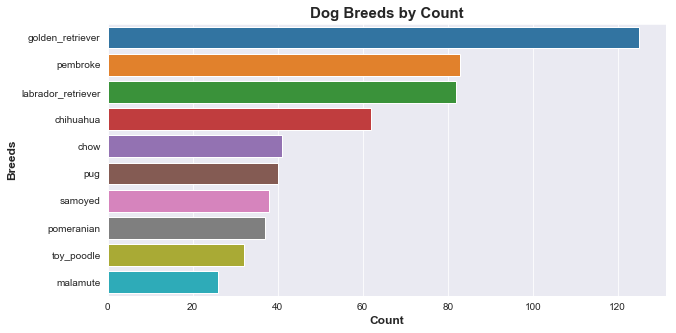

In [84]:
# define figure size
plt.figure(figsize=(10, 5))

# horizontal bar chart using seaborn
sns.barplot(x=df_breeds, y=df_breeds.index)

# adjusting title, labels, and ticks
title, xlabel, ylabel = 'Dog Breeds by Count', 'Count', 'Breeds'

plt.title(title, fontweight='bold', fontsize=15)
plt.xlabel(xlabel, fontweight='bold', fontsize=12)
plt.ylabel(ylabel, fontweight='bold', fontsize=12);

> Most popular dog breed on tweet was Golden Retriever, followed by Pembroke (Welsh Corgi) and Labrador Retriever.<br>
Rank 10 came out to be Malamute

**Q5.Number of Tweets by Day of Week**

In [106]:
df_dow = df_master['timestamp'].dt.dayofweek.value_counts().sort_index()
df_dow

0    248
1    225
2    225
3    226
4    220
5    198
6    194
Name: timestamp, dtype: int64

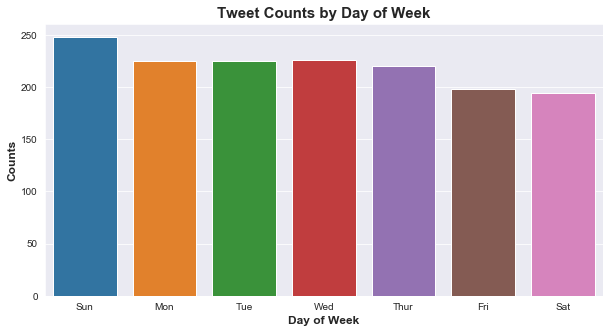

In [108]:
# define figure size
plt.figure(figsize=(10, 5))

dow_index = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
# horizontal bar chart using seaborn
sns.barplot(x=dow_index, y=df_dow)

# adjusting title, labels, and ticks
title, xlabel, ylabel = 'Tweet Counts by Day of Week', 'Day of Week', 'Counts'

plt.title(title, fontweight='bold', fontsize=15)
plt.xlabel(xlabel, fontweight='bold', fontsize=12)
plt.ylabel(ylabel, fontweight='bold', fontsize=12);

> Sunday was the busiest day for WeRateDogs

---
#### Reference
- Convert Tweepy Status object into JSON: https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
- Reading/Writing JSON to a File in Python: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- Datetime dtypes in pandas read_csv: https://stackoverflow.com/questions/21269399/datetime-dtypes-in-pandas-read-csv